In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data=pd.read_csv(r'Crop_recommendation.csv')

In [5]:
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [6]:
data.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


# data preprocessing

In [7]:
data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [8]:
data.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [13]:
data.corr()

ValueError: could not convert string to float: 'rice'

In [11]:
data.shape

(2200, 8)

# split the dataset

In [14]:
x=data.drop(['label'],axis=1)

In [15]:
x.head()

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340


In [16]:
y=data['label']

In [17]:
y.head()

0    rice
1    rice
2    rice
3    rice
4    rice
Name: label, dtype: object

<Axes: >

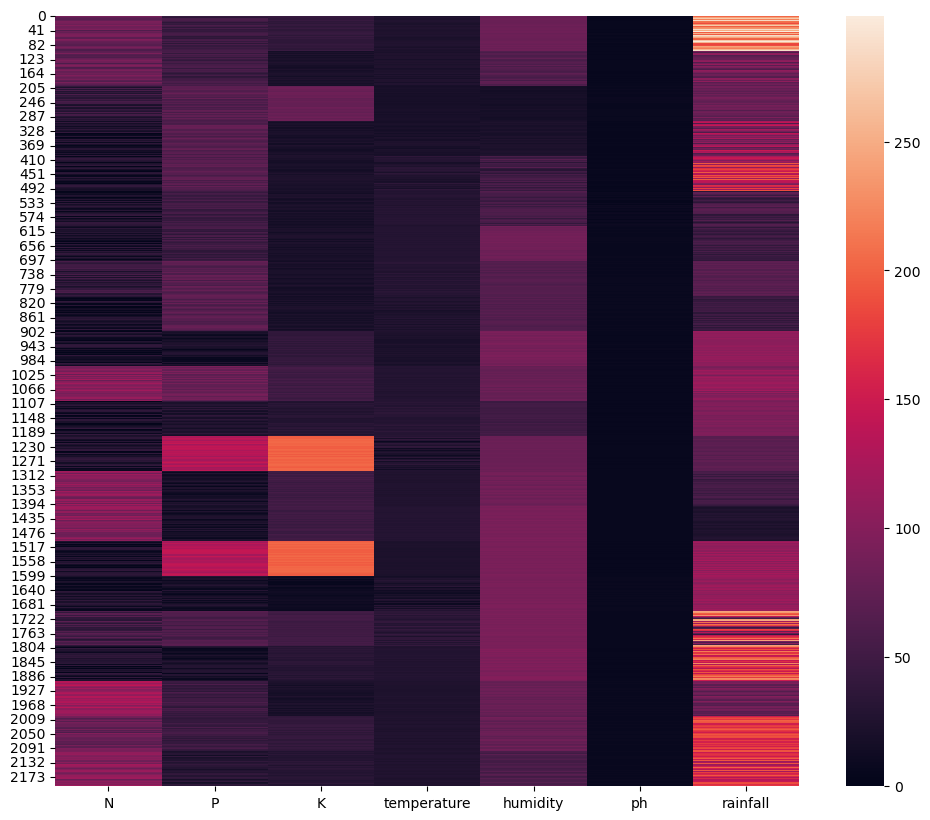

In [18]:
plt.figure(figsize=[12,10])
sns.heatmap(data=x)

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [20]:
x_train.shape

(1760, 7)

In [21]:
y_train.shape

(1760,)

In [22]:
x_test.shape

(440, 7)

In [23]:
y_test.shape

(440,)

# model

In [24]:
#LogisticRegression

from sklearn.linear_model import LogisticRegression
model1=LogisticRegression()
model1.fit(x_train,y_train)
model1.score(x_test,y_test)

c:\Users\Santhosh . S\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9681818181818181

In [25]:
#RandomForest 

from sklearn.ensemble import RandomForestClassifier
model2=RandomForestClassifier()
model2.fit(x_train,y_train)
model2.score(x_test,y_test)

0.9931818181818182

In [26]:
#KNN

from sklearn.neighbors import KNeighborsClassifier
model3=KNeighborsClassifier()
model3.fit(x_train,y_train)
model3.score(x_test,y_test)

0.975

In [27]:
#Support vector machine

from sklearn.naive_bayes import GaussianNB
model4=GaussianNB()
model4.fit(x_train,y_train)
model4.score(x_test,y_test)

0.9931818181818182

# accuracy

In [28]:
y_pred=model2.predict(x_test)

In [29]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9931818181818182

# prediction

In [30]:
x_test=pd.DataFrame(x_test)
y_test=pd.DataFrame(y_test)

In [31]:
x_test.head(1)

,N,P,K,temperature,humidity,ph,rainfall
1273,35,135,199,21.774667,80.549426,6.40072,69.396304


In [32]:
y_test.head(1)

,label
1273,grapes


In [33]:
a=[89,52,45,24.893263,77.012226,7.207457,196.469984]

In [34]:
predicted_output=model2.predict([a])

c:\Users\Santhosh . S\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [35]:
print(predicted_output)

['jute']



# Model Score

In [36]:
aa=model2.score(x_test,y_test)

bb=model3.score(x_test,y_test)

cc=model4.score(x_test,y_test)

print(aa,bb,cc)

0.9931818181818182 0.975 0.9931818181818182


In [37]:
import pickle

# Choose the best model (Random Forest has the best accuracy)
best_model = model2   # model2 = RandomForestClassifier

# Save it as pickle
with open('crop_recommendation_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)

print("✅ Model saved successfully as crop_recommendation_model.pkl")


✅ Model saved successfully as crop_recommendation_model.pkl
